# <font color='#fddf0a'>**Pi Challenge**</font>
---

# <font color='#aeafaf'>**Índice**</font>

1. <font color='#7099c2'>**Descripción del Notebook**</font>
2. <font color='#7099c2'>**Configuraciones**</font>
   - Importación de Librerías
   - Paths
   - Paleta de Colores del Proyecto
3. <font color='#7099c2'>**Extracción de datos y exploración inicial**</font>

# <font color='#7099c2'>**Descripción del Notebook**</font>

# <font color='#7099c2'>**Configuraciones**</font>

## <font color='#fde74c'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

import os
import warnings
import pickle

from timeit import default_timer as timer
from datetime import datetime

from pathlib import Path
from typing import Tuple, Callable, List

## <font color='#fde74c'>**Paths**</font>

In [2]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

data = Path('data')
DATA_PATH = PROJECT_PATH / data

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports


dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\data

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\reports



## <font color='#fde74c'>**Paleta de Colores del Proyecto**</font>

**Amarillos (Basados en #fddf0a)**

<span style="display:inline-block; width:20px; height:20px; background:#b29b07; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fddf0a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fde74c; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fef08d; margin-right:5px;"></span>


**Violetas (Basados en #c30afd)**

<span style="display:inline-block; width:20px; height:20px; background:#7b06a1; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#c30afd; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#d451fd; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#e698fe; margin-right:5px;"></span>


**Grises / Neutros (Basados en #474848)**

<span style="display:inline-block; width:20px; height:20px; background:#2e2f2f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#474848; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7a7b7b; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#aeafaf; margin-right:5px;"></span>


**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0a1a2f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#1c3d5a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#336699; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7099c2; margin-right:5px;"></span>


In [3]:
# Paleta de Colores del Proyecto
AMARILLO_1, AMARILLO_2, AMARILLO_3, AMARILLO_4 = '#b29b07', '#fddf0a', '#fde74c', '#fef08d'
VIOLETA_1, VIOLETA_2, VIOLETA_3, VIOLETA_4 = '#7b06a1', '#c30afd', '#d451fd', '#e698fe'
GRIS_1, GRIS_2, GRIS_3, GRIS_4 = '#2e2f2f', '#474848', '#7a7b7b', '#aeafaf'
AZUL_1, AZUL_2, AZUL_3, AZUL_4 = '#0a1a2f', '#1c3d5a', '#336699', '#7099c2'

In [4]:
# Definir los colores personalizados
custom_colors = [

    '#0a1a2f', '#1c3d5a', '#336699', '#7099c2', 
    '#e698fe', '#d451fd', '#c30afd', '#7b06a1',
    '#7b06a1', '#c30afd', '#d451fd', '#e698fe',
    '#b29b07', '#fddf0a', '#fde74c', '#fef08d', 
    
]

# Crear el colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
reverse_custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors[::-1])

#### **Colores Principales Pi**

`AMARILLO_2` = '#fddf0a'<br>
`VIOLETA_2` = '#c30afd'

# <font color='#7099c2'>**Extracción de datos y exploración inicial**</font>

## <font color='#fde74c'>**Extracción de datos**</font>

In [5]:
train_ds = pd.read_csv(DATA_PATH/ 'Train_BigMart.csv')
test_ds = pd.read_csv(DATA_PATH/ 'Test_BigMart.csv')

## <font color='#fde74c'>**Exploración inicial**</font>

### <font color='#e698fe'>**Train Set**</font>

In [6]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Valores nulos en `Item_Weight` y `Outlet_Size`

In [8]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
categoricas = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 
               'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [11]:
for col in categoricas:
    unicos = train_ds[col].unique()
    q = train_ds[col].nunique()
    print(f'Valores únicos para {col}: {q}\n')
    print(unicos)
    print('\n','=' * 75,'\n')

Valores únicos para Item_Fat_Content: 5

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Valores únicos para Item_Type: 16

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Valores únicos para Outlet_Identifier: 10

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Valores únicos para Outlet_Establishment_Year: 9

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


Valores únicos para Outlet_Size: 3

['Medium' nan 'High' 'Small']


Valores únicos para Outlet_Location_Type: 3

['Tier 1' 'Tier 3' 'Tier 2']


Valores únicos para Outlet_Type: 4

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




### <font color='#e698fe'>**Test Set**</font>

In [12]:
test_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Valores nulos en `Item_Weight` y `Outlet_Size`

In [14]:
test_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [15]:
for col in categoricas:
    unicos = test_ds[col].unique()
    q = test_ds[col].nunique()
    print(f'Valores únicos: {q}\n')
    print(unicos)
    print('\n','=' * 75,'\n')

Valores únicos: 5

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


Valores únicos: 16

['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


Valores únicos: 10

['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']


Valores únicos: 9

[1999 2007 1998 1985 1997 2009 2002 1987 2004]


Valores únicos: 3

['Medium' nan 'Small' 'High']


Valores únicos: 3

['Tier 1' 'Tier 2' 'Tier 3']


Valores únicos: 4

['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']




## <font color='#fde74c'>**Tratamiento de Valores Faltantes**</font>

### <font color='#e698fe'>**Item_Weight**</font>

In [16]:
train_ds['Item_Identifier'].nunique()

1559

In [17]:
# Filtrar los registros que tienen valores nulos en la columna 'Item_Weight'
non_weight = train_ds[train_ds['Item_Weight'].isna()]

In [18]:
non_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [19]:
train_ds[train_ds['Item_Identifier'] == 'FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [20]:
train_ds[train_ds['Item_Identifier'] == 'DRI11']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


In [21]:
item_weight_map = train_ds.groupby('Item_Identifier')['Item_Weight'].max()

train_ds['Item_Weight'] = train_ds['Item_Weight'].fillna(train_ds['Item_Identifier'].map(item_weight_map))

In [22]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### <font color='#c30afd'>**Observaciones Tratamiento de Valores Faltantes: Item_Weight**</font>

Una breve exploración inicial mostró que a pesar de tener valores nulos, existen registros del mismo producto donde el peso del este está completo, por lo que se utilizaron dichos registros para completar aquellos datos faltantes

*De esta manera se redujeron **1463 filas con registros nulos a tan solo 4.***

### <font color='#e698fe'>**Outlet_Size**</font>

In [23]:
# Filtrar los registros que tienen valores nulos en la columna 'Outlet_Size'
non_outlet_size = train_ds[train_ds['Outlet_Size'].isna()]

In [24]:
non_outlet_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [25]:
non_outlet_size['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [26]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [27]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [28]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].unique()

array([nan], dtype=object)

In [29]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].unique()

array([nan], dtype=object)

In [30]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].unique()

array([nan], dtype=object)

In [31]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].unique()

array([nan], dtype=object)

In [32]:
train_ds.groupby(['Outlet_Identifier', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: count, dtype: int64

In [33]:
test_ds.groupby(['Outlet_Identifier', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           621
OUT018             Medium         618
OUT019             Small          352
OUT027             Medium         624
OUT035             Small          620
OUT046             Small          620
OUT049             Medium         620
Name: count, dtype: int64

In [41]:
outlets = train_ds[['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].copy()
outlets = outlets.drop_duplicates()
outlets

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
1,OUT018,Medium,Tier 3,Supermarket Type2
3,OUT010,NaN,Tier 3,Grocery Store
4,OUT013,High,Tier 3,Supermarket Type1
7,OUT027,Medium,Tier 3,Supermarket Type3
8,OUT045,NaN,Tier 2,Supermarket Type1
9,OUT017,NaN,Tier 2,Supermarket Type1
11,OUT046,Small,Tier 1,Supermarket Type1
19,OUT035,Small,Tier 2,Supermarket Type1
23,OUT019,Small,Tier 1,Grocery Store


In [42]:
sizes = train_ds.groupby(['Outlet_Type', 'Outlet_Size']).size()
sizes

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [43]:
sizes = train_ds.groupby(['Outlet_Identifier']).size().reset_index()
sizes = sizes.rename(columns={0: 'Sells_Registered'})

In [44]:
outlets = outlets.merge(sizes, on='Outlet_Identifier')
outlets.sort_values(by='Outlet_Type')

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sells_Registered
2,OUT010,NaN,Tier 3,Grocery Store,555
9,OUT019,Small,Tier 1,Grocery Store,528
0,OUT049,Medium,Tier 1,Supermarket Type1,930
3,OUT013,High,Tier 3,Supermarket Type1,932
5,OUT045,NaN,Tier 2,Supermarket Type1,929
6,OUT017,NaN,Tier 2,Supermarket Type1,926
7,OUT046,Small,Tier 1,Supermarket Type1,930
8,OUT035,Small,Tier 2,Supermarket Type1,930
1,OUT018,Medium,Tier 3,Supermarket Type2,928
4,OUT027,Medium,Tier 3,Supermarket Type3,935


### <font color='#c30afd'>**Observaciones Tratamiento de Valores Faltantes: Outlet_Size**</font>

**OUT010**

Dado que Grocery Store hay solo 2, mi análisis es el siguiente:

| Outlet_Identifier   | Outlet_Size	| Outlet_Location_Type	| Outlet_Type   | Sells_Registered | 
|---------------------|-------------|-----------------------|---------------|------------------|
| OUT019              | Small       | Tier 1                | Grocery Store | 528              |
| OUT010              | NaN         | Tier 3                | Grocery Store | 555              |

Dado que dentro de la columna `Outlet_Type` solo existen 2 tiendas de características **Grocery Store** y que dentro de `Outlet_Location_Type` = **Tier 3** existen tanto locales **Medium** como **High**, sin embargo, el volumen de ventas es mucho mayor (**OUT013	= 932** y **OUT018 = 928**), por lo que sólo podría asumirse que este tipo de tienda es de tamaño **Small** debido a que existe a mi parecer una única comparación lógica que es con tienda del mismo tipo.


**OUT045** y **OUT017**

Las otras dos tiendas que tienen NaN en su tamaño son: **OUT045** y **OUT017**

| Outlet_Identifier   | Outlet_Size	| Outlet_Location_Type	| Outlet_Type       | Sells_Registered |
|---------------------|-------------|-----------------------|-------------------|------------------|
| OUT045              | NaN         | Tier 2                | Supermarket Type1 | 929              |
| OUT017              | NaN         | Tier 2                | Supermarket Type1 | 926              |
| OUT035	          | Small	    | Tier 2	            | Supermarket Type1 | 930              |

Comparten Outlet_Type y Outlet_Location_Type con OUT035

Si bien la mayor cantidad de tiendas corresponden a `Outlet_Type = 'Supermarket Type1'`, los ejemplos mostrados son las únicas pertenecientes a `Outlet_Location_Type = 'Tier 2'`, dado que no contamos con información adicional, podríamos asumir que esto se refiere a un tipo de negocio específico para un área geográfica, como por ejemplo, zonas residenciales. En cuanto al volumen de ventas, este no muestra diferencias significativas entre las tiendas `Outlet_Type = 'Supermarket Type1'`, por lo que, debido a las similutudes con el unico caso completo, también se completarán los NaN como "Small".

In [48]:
train_ds['Outlet_Size'] = train_ds['Outlet_Size'].fillna('Small')
test_ds['Outlet_Size'] = test_ds['Outlet_Size'].fillna('Small')

In [47]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## <font color='#fde74c'>**Normalización de Datos**</font>

### <font color='#e698fe'>**Item_Fat_Content**</font>

In [50]:
train_item_fat_content_vals = train_ds['Item_Fat_Content'].unique()
test_item_fat_content_vals = test_ds['Item_Fat_Content'].unique()

print(f'Valores únicos en Train:\n')
print(train_item_fat_content_vals)
print('\n','=' * 75,'\n')
print(f'Valores únicos en Test:\n')
print(test_item_fat_content_vals)
print('\n','=' * 75,'\n')

Valores únicos en Train:

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Valores únicos en Test:

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']




In [52]:
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat')
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat')

In [51]:
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace('reg', 'Regular')
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].replace('reg', 'Regular')

In [53]:
train_item_fat_content_vals = train_ds['Item_Fat_Content'].unique()
test_item_fat_content_vals = test_ds['Item_Fat_Content'].unique()

print(f'Valores únicos en Train:\n')
print(train_item_fat_content_vals)
print('\n','=' * 75,'\n')
print(f'Valores únicos en Test:\n')
print(test_item_fat_content_vals)
print('\n','=' * 75,'\n')

Valores únicos en Train:

['Low Fat' 'Regular']


Valores únicos en Test:

['Low Fat' 'Regular']




# <font color='#fddf0a'>**Conclusiones: Extracción de datos y exploración inicial**</font>

Tras el análisis de los conjuntos de datos de entrenamiento (`train`) y prueba (`test`), se identificaron patrones de inconsistencia y valores faltantes que requirieron un proceso de curación de datos orientado al negocio.

---

#### <font color='#fde74c'>**Tratamiento de valores faltantes**</font>

Ambos datasets presentaban valores nulos en los campos `Item_Weight` y `Outlet_Size`. Para garantizar la integridad de la información sin recurrir a la eliminación de registros, se aplicaron las siguientes lógicas:

* **Variable `Item_Weight`**: Se detectó que el peso es una propiedad intrínseca de cada producto. Por lo tanto, se utilizó un mapeo por `Item_Identifier` para completar los valores faltantes a partir de otros registros existentes para el mismo producto, logrando una imputación precisa y basada en evidencia física.

* **Variable `Outlet_Size`**: La imputación se realizó bajo un enfoque de **análisis de segmentos y volumen operativo**:
    * **Caso OUT010 (Tier 3 / Grocery Store)**: Al comparar el volumen de registros entre tipos de tiendas, se observó que las *Grocery Stores* (aprox. 550 transacciones) operan a una escala significativamente menor que los *Supermarkets* del mismo Tier (aprox. 930 transacciones). Dada esta diferencia en el volumen operativo y la naturaleza del modelo de negocio, se determinó la categoría **'Small'** como la más representativa.
    * **Casos OUT045 y OUT017 (Tier 2 / Supermarket Type 1)**: Se aplicó una técnica de **Imputación por Segmentos**. Se identificó que el clúster definido por la combinación `Tier 2` y `Supermarket Type 1` es operativamente homogéneo y no presenta registros de tiendas de mayor escala. Dado que el único registro completo en este segmento (`OUT035`) figura como **'Small'**, se procedió a completar los nulos como **'Small'** para mantener la consistencia del perfil operativo regional.


#### <font color='#fde74c'>**Normalización de Datos**</font>

* **Variable `Item_Fat_Content`**: Se identificaron inconsistencias en el registro de etiquetas (ej: "LF", "low fat", "Low Fat"). Se realizó una limpieza para consolidar los datos en dos categorías únicas: **'Low Fat'** y **'Regular'**, eliminando el ruido que afectaría las predicciones del modelo.


#### <font color='#fde74c'>**Ingeniería de Características (Feature Engineering)**</font>

* **Antigüedad de la tienda**: El dataset original provee el año de apertura (`Outlet_Establishment_Year`). Con el fin de facilitar la interpretación para el modelo de regresión lineal, se propone la creación de la variable **`Outlet_Tenure`** (Antigüedad), calculada como la diferencia entre el año actual y el año de fundación. Se asume que la longevidad de un establecimiento puede ser un factor determinante en la lealtad de la clientela y la estabilidad del volumen de ventas.

# <font color='#7099c2'>**Análisis Exploratorio de Datos (EDA)**</font>

* `Item_Identifier`
* `Item_Weight`
* `Item_Fat_Content`
* `Item_Visibility`
* `Item_Type`
* `Item_MRP`
* `Outlet_Identifier`
* `Outlet_Establishment_Year`
* `Outlet_Size`
* `Outlet_Location_Type`
* `Outlet_Type`
* `Item_Outlet_Sales`

#### <font color='#fde74c'>**Productos**</font>

1. ¿Cuáles son las categorías de productos más vendidas y cuáles generan mayores ingresos?
2. ¿La mayor cantidad de ingresos proviene de productos saludables (`Low Fat`) o regulares (`Regular`)?
3. ¿Los productos más pesados tienen mayor salida en las tiendas grandes?
4. ¿La visibilidad del producto está relacionada a la venta total?

#### <font color='#fde74c'>**Tiendas**</font>

5. ¿Existe predominancia en alguna categoría de producto dependiendo el tipo de tienda (`Outlet_Type`)?
6. ¿Que tan incidente resulta el ranking de tipo de ubicación (`Outlet_Location_Type`)
7. ¿Las tiendas grandes concentran mayor ventas de algún tipo de producto en particular?
8. ¿Las tiendas más antiguas presentan mayor ventas debido a una clientela más leal?

In [38]:
outlets_and_item_type = pd.DataFrame(train_ds.groupby(['Outlet_Type', 'Item_Type'])['Item_Outlet_Sales'].sum()).reset_index()
outlets_and_item_type

,Outlet_Type,Item_Type,Item_Outlet_Sales
0,Grocery Store,Baking Goods,24827.0162
1,Grocery Store,Breads,12604.9256
2,Grocery Store,Breakfast,7843.7898
3,Grocery Store,Canned,25759.1362
4,Grocery Store,Dairy,31451.7262
...,...,...,...
59,Supermarket Type3,Others,40513.9300
60,Supermarket Type3,Seafood,18809.5158
61,Supermarket Type3,Snack Foods,513088.1172
62,Supermarket Type3,Soft Drinks,147822.2476


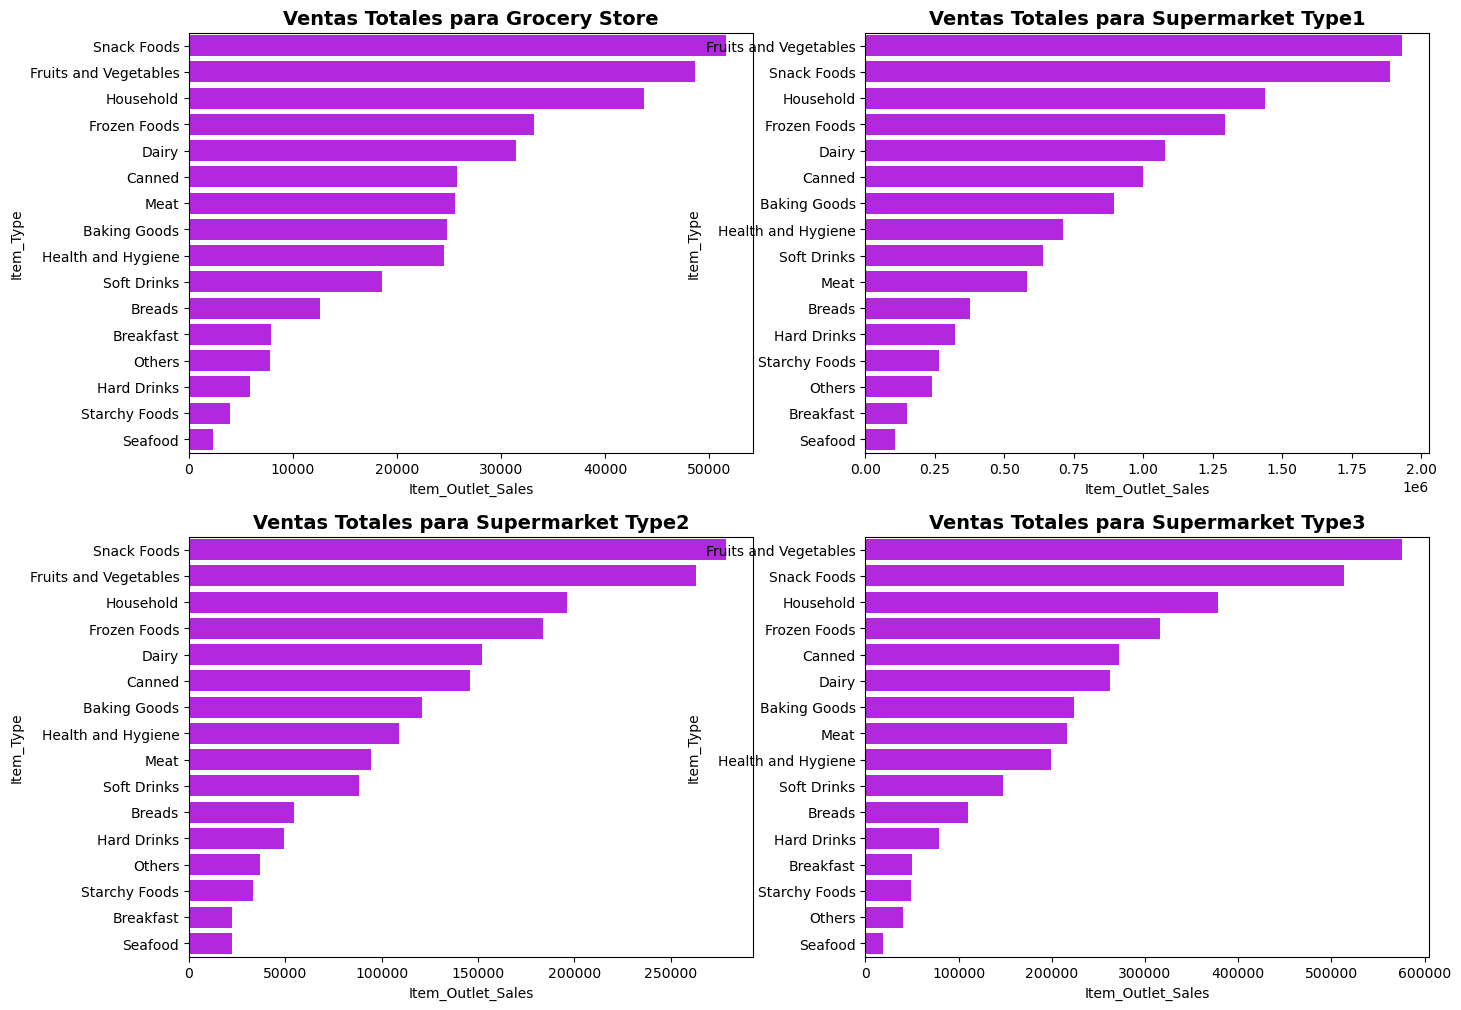

In [39]:
outlet_types = outlets_and_item_type['Outlet_Type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(16,12))

flat_axes = axes.flatten()

for ax, outlet_type in zip(flat_axes, outlet_types):
    cur_type = outlets_and_item_type[outlets_and_item_type['Outlet_Type'] == outlet_type].sort_values(by='Item_Outlet_Sales', ascending=False)
    
    sns.barplot(data=cur_type, x='Item_Outlet_Sales', y='Item_Type', ax=ax, color=VIOLETA_2)

    ax.set_title(f'Ventas Totales para {outlet_type}', fontsize=14, fontweight='bold')